In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
csv_file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\pokemon_dataset.csv'
df = pd.read_csv(csv_file_path)
df.head()

,pokemon_id,name,primary_type,secondary_type,first_appreance,generation,category,total_base_stats,hp,attack,defense,special_attack,special_defense,speed
0,1,bulbasaur,grass,poison,red/blue,gen 1,regular,318,45,49,49,65,65,45
1,2,ivysaur,grass,poison,red/blue,gen 1,regular,405,60,62,63,80,80,60
2,3,venusaur,grass,poison,red/blue,gen 1,regular,525,80,82,83,100,100,80
3,4,charmander,fire,NaN,red/blue,gen 1,regular,309,39,52,43,60,50,65
4,5,charmeleon,fire,NaN,red/blue,gen 1,regular,405,58,64,58,80,65,80


In [2]:
df.isnull().sum()

pokemon_id            0
name                  0
primary_type          0
secondary_type      499
first_appreance       0
generation            0
category              0
total_base_stats      0
hp                    0
attack                0
defense               0
special_attack        0
special_defense       0
speed                 0
dtype: int64

In [3]:
df['first_appreance'] = pd.to_datetime(df['first_appreance'], errors='coerce')

# Check for any remaining issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pokemon_id        1025 non-null   int64         
 1   name              1025 non-null   object        
 2   primary_type      1025 non-null   object        
 3   secondary_type    526 non-null    object        
 4   first_appreance   0 non-null      datetime64[ns]
 5   generation        1025 non-null   object        
 6   category          1025 non-null   object        
 7   total_base_stats  1025 non-null   int64         
 8   hp                1025 non-null   int64         
 9   attack            1025 non-null   int64         
 10  defense           1025 non-null   int64         
 11  special_attack    1025 non-null   int64         
 12  special_defense   1025 non-null   int64         
 13  speed             1025 non-null   int64         
dtypes: datetime64[ns](1), in

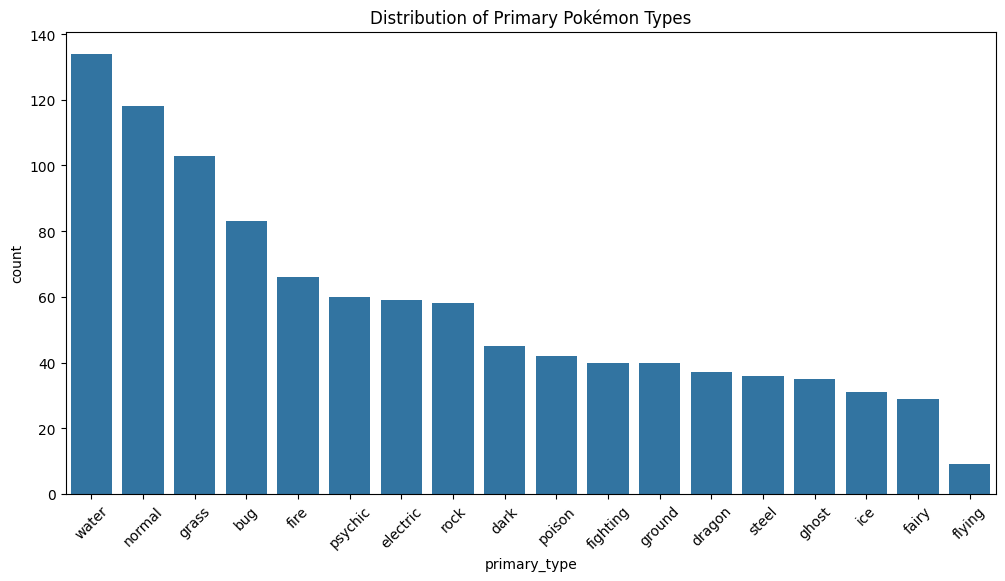

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='primary_type', order=df['primary_type'].value_counts().index)
plt.title('Distribution of Primary Pokémon Types')
plt.xticks(rotation=45)
plt.show()

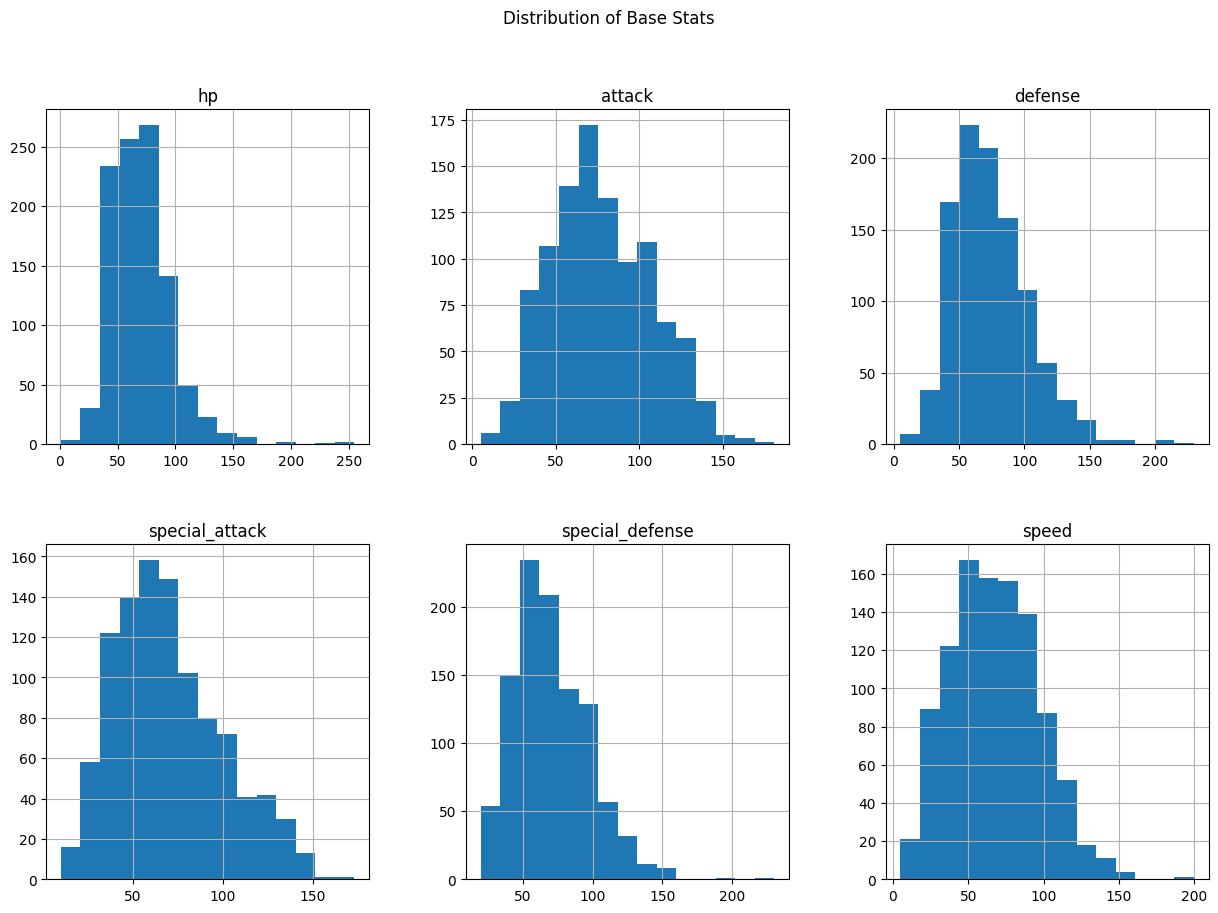

In [5]:
base_stats = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
df[base_stats].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribution of Base Stats')
plt.show()

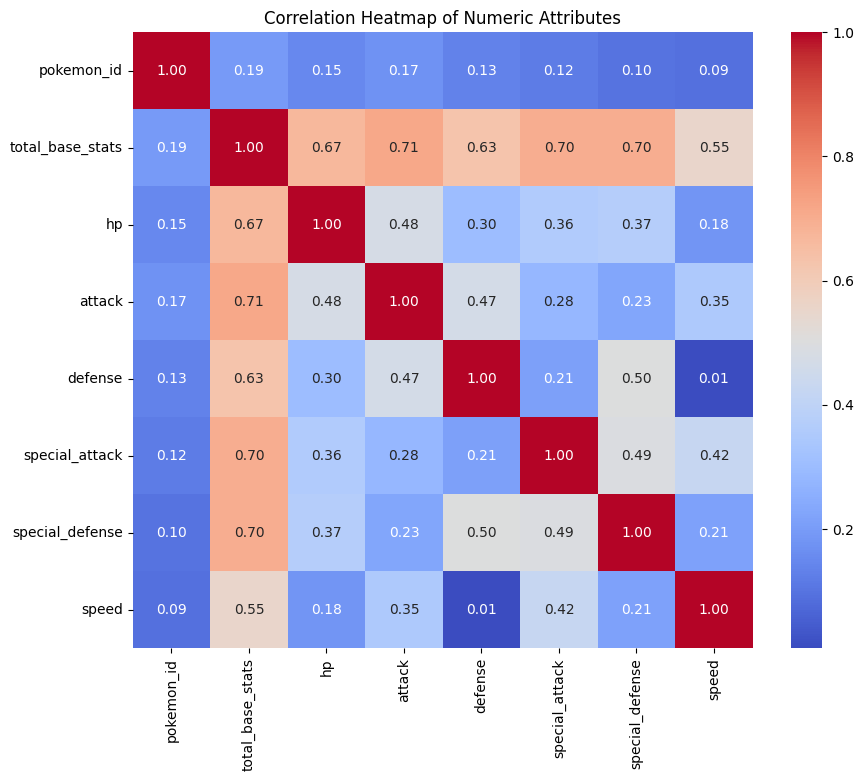

In [6]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare the data
X = df[base_stats]
y = df['generation']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy, conf_matrix

(0.1951219512195122,
 array([[9, 4, 6, 1, 5, 0, 2, 0, 2],
        [3, 2, 2, 0, 2, 2, 0, 2, 2],
        [8, 3, 6, 3, 6, 0, 2, 3, 1],
        [1, 3, 1, 1, 5, 0, 1, 3, 4],
        [6, 3, 7, 4, 9, 2, 1, 3, 3],
        [1, 1, 0, 1, 2, 2, 1, 0, 3],
        [3, 2, 2, 2, 3, 0, 2, 2, 1],
        [0, 1, 3, 1, 4, 2, 1, 2, 5],
        [7, 1, 2, 2, 4, 0, 1, 1, 7]], dtype=int64))